# 1D fit example with class

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Class with static 

In [2]:
class Fitter1:

    @staticmethod
    def func(x, a, b, c):
        return a * np.exp(-b * x) + c
    
    def makedata(self):
        self.xdata = np.linspace(0, 4, 50)
        y = Fitter1.func(self.xdata, 2.5, 1.3, 0.5)
        rng = np.random.default_rng()

        y_noise = 0.2 * rng.normal(size=self.xdata.size)
        self.ydata = y + y_noise
        
    def fit(self):
        popt, pcov = curve_fit(Fitter1.func, self.xdata, self.ydata)
        return popt,pcov


In [3]:
myfitter = Fitter1()


In [4]:
myfitter.makedata()

In [5]:
popt,pcov = myfitter.fit()

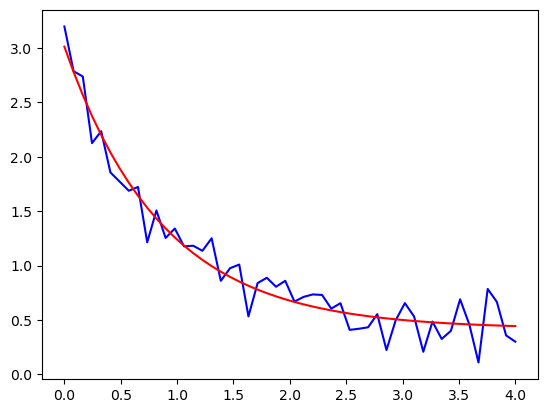

In [6]:
plt.plot(myfitter.xdata, myfitter.ydata, 'b-', label='data')
plt.plot(myfitter.xdata, Fitter1.func(myfitter.xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


# Class without  static function

In [7]:
class Fitter2:

    def func(self,x, a, b, c):
        return a * np.exp(-b * x) + c
    
    def makedata(self):
        self.xdata = np.linspace(0, 4, 50)
        y = self.func(self.xdata, 2.5, 1.3, 0.5)
        rng = np.random.default_rng()

        y_noise = 0.2 * rng.normal(size=self.xdata.size)
        self.ydata = y + y_noise
        
    def fit(self):
        popt, pcov = curve_fit(self.func, self.xdata, self.ydata)
        return popt,pcov


In [8]:
myfitter = Fitter2()
myfitter.makedata()
popt,pcov = myfitter.fit()

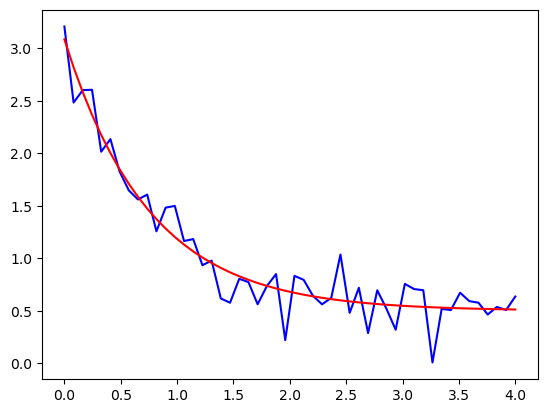

In [9]:
plt.plot(myfitter.xdata, myfitter.ydata, 'b-', label='data')
plt.plot(myfitter.xdata, myfitter.func(myfitter.xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))